# Lecture 21: Linear Regression in R

In [3]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
options(repr.plot.width = 12, repr.plot.height = 8)

In [2]:
# 2024 ITUS Household Data (processed)
url  <- "https://raw.githubusercontent.com/anmpahwa/CE5540/refs/heads/main/resources/ITUS_HHD_DT.csv"
data <- read.csv(url) # Loading Data
str(data)

'data.frame':	139487 obs. of  21 variables:
 $ Unique_HH_ID       : chr  "2024-30010-1-241-17-13-11-2-2420-4-1" "2024-30010-1-241-17-13-11-2-2420-4-2" "2024-30010-1-241-17-13-11-2-2420-4-3" "2024-30010-1-241-17-13-11-2-2420-4-4" ...
 $ time_of_year       : int  2 2 2 2 2 2 2 2 2 2 ...
 $ day_of_week        : int  2 3 7 7 4 6 4 1 5 2 ...
 $ sector             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ region             : int  2 2 2 2 2 2 2 2 2 2 ...
 $ district_population: int  1642268 1642268 1642268 1642268 1642268 1642268 1642268 1642268 1642268 1642268 ...
 $ gender_ratio       : num  0 0.5 0.4 0.556 0.5 0.5 0.5 0.429 0.5 0.333 ...
 $ average_age        : num  45 34.5 29.2 15 21.8 65.5 20.2 26 62.5 19.3 ...
 $ marital_status     : int  1 2 2 2 2 2 2 2 2 2 ...
 $ highest_eduLevel   : int  11 11 5 4 3 11 4 11 4 5 ...
 $ employment_ratio   : num  1 0.25 0.4 0.222 0.333 0 0.333 0.286 0.5 0.333 ...
 $ family_structure   : num  0 0.25 0.4 0.778 0.5 0 0.667 0.286 0 0.333 ...
 $ household_size     

## Ex-Ante Diagnostics

Before fitting a linear regression model, it's helpful to explore the realtionship between endogenous and exogenous variables. For instance, a pair-wise scatter plot along with correlation analysis can reveal the direction, form, and strength of the relationship, as well as the presence of outliers.

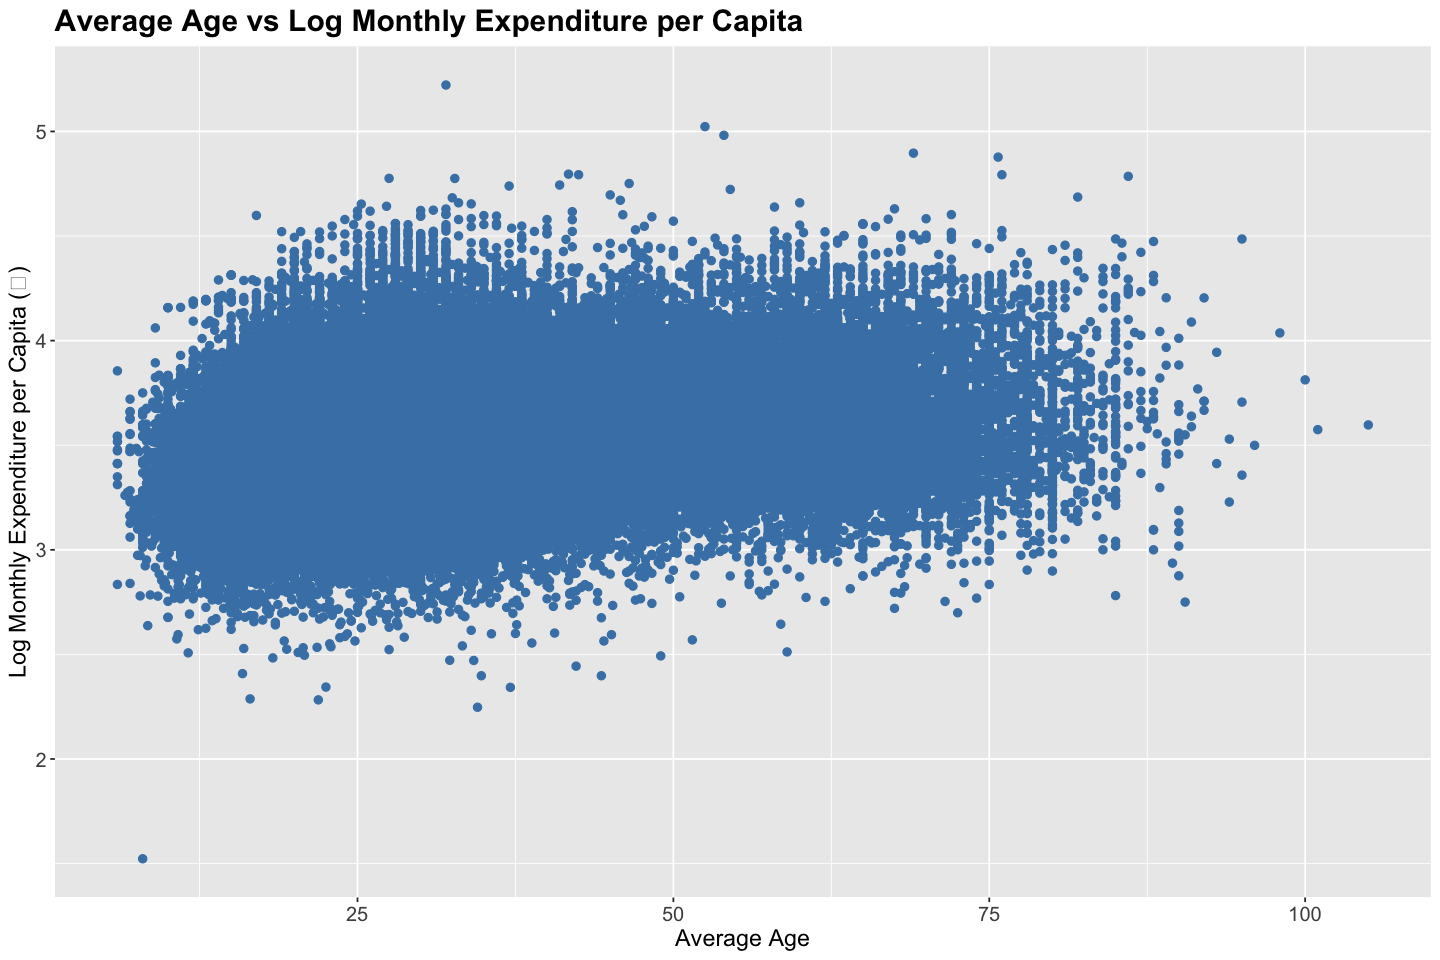

In [35]:
# Scatter Plot
ggplot(data, aes(x = average_age, y = log10(total_expenditure / household_size))) +
  geom_point(color = "steelblue", size = 2) +
  labs(
    title = "Average Age vs Log Monthly Expenditure per Capita",
    x = "Average Age",
    y = "Log Monthly Expenditure per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

In [36]:
# Correlation Analysis
correlations <- cor(data$average_age, log10(data$total_expenditure / data$household_size))
cat("Correlation between household size and monthly expenditure:", round(correlations, digits = 3), "\n")

Correlation between household size and monthly expenditure: 0.264 



---

## Model Diagnostics

Once we fit a linear regression model, we assess its quality and the reliability of the estimates using summary statistics

### Summary Statistics

- Sum of Squares Total (SST) captures the total variation in the dependent variable around its mean - $\text{SST} = \sum_i (Y_i - \bar{Y})^2$

- Sum of Squares Regression (SSR) captures the variation explained by the model - $\text{SSR} = \sum_i (\hat{Y}_i - \bar{Y})^2$

- Sum of Squared Errors (SSE) captures the total deviation of the predicted values from the actual observed values - $\text{SSE} = \sum_i (Y_i - \hat{Y}_i)^2$
  
- Residual Standard Error (RSE) captures the average prediction error in the units of the response variable - $\text{RSE} = \sqrt{\text{SSE} / (n - k - 1)}$
  
- R-squared ($R^2$) captures the proportion of total variation explained by the model - $R^2 = \text{SSR} / \text{SST}$
  
- Adjusted R-squared ($\bar{R}^2$) captures the proportion of total variation explained by the model, penalizing for the number of predictors - $\bar{R}^2 = 1 - (n - 1) / (n - k - 1) (1 - R^2)$

```{note} 
Sum of Squares Total equals the Sum of Squares Regression plus Sum of Squares Error - $SST = SSR + SSE$
```

### Hypothesis Tests

- Test of Significane for Individual Coefficients: Each coefficient is tested against the null hypothesis $H_o: \beta_j = 0$ using the t-test statistics $t = \hat{\beta}_j / \text{SE}(\hat{\beta}_j)$
  
- Test of Significant for the Overall Model: The entire model is tested against the null hypothesis $H_o: \beta_j = 0 \ \forall \ j$ using the F-test statistic $F = (n - k - 1) \times \text{SSR} / (k \times \text{SSE})$


```{tip} 
Given, $\text{Var}(\epsilon) = \sigma^2 I$, we get, $\text{Var}(\hat{\beta}_j) = \sigma^2 [(X^\top X)^{-1}]_{jj}$
```

In [37]:
# Model: Household Size vs Monthly Expenditure
model <- lm(log10(total_expenditure / household_size) ~ average_age, data = data)

In [38]:
# Summary
summary(model)


Call:
lm(formula = log10(total_expenditure/household_size) ~ average_age, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.88252 -0.16236 -0.01736  0.14643  1.70552 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.368e+00  1.635e-03  2060.8   <2e-16 ***
average_age 4.622e-03  4.518e-05   102.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2449 on 139485 degrees of freedom
Multiple R-squared:  0.06981,	Adjusted R-squared:  0.06981 
F-statistic: 1.047e+04 on 1 and 139485 DF,  p-value: < 2.2e-16


In [40]:
# Errors

sst <- sum((log10(data$total_expenditure / data$household_size) - mean(log10(data$total_expenditure / data$household_size)))^2)
ssr <- sum((model$fitted.values - mean(log10(data$total_expenditure / data$household_size)))^2)
sse <- sum((log10(data$total_expenditure / data$household_size) - model$fitted.values)^2)
rse <- sqrt(sse / (nrow(data) - 2))
Rsquared <- ssr / sst
AdjRsquared <- 1 - (1 - Rsquared) * (nrow(data) - 1) / (nrow(data) - 2)
cat("SST               :", round(sst, 2), "\n")
cat("SSR               :", round(ssr, 2), "\n")
cat("SSE               :", round(sse, 2), "\n")
cat("RSE               :", round(rse, 2), "\n")
cat("R-squared         :", round(Rsquared, 3), "\n")
cat("Adjusted R-squared:", round(AdjRsquared, 3), "\n")

SST               : 8996.15 
SSR               : 628.05 
SSE               : 8368.1 
RSE               : 0.24 
R-squared         : 0.07 
Adjusted R-squared: 0.07 



---

## Ex-Post Diagnostics

After fitting a linear regression model, it is essential to evaluate whether the underlying model assumptions are valid. These assumptions include linearity of the relationship between predictors and the response, independence of residuals, homoskedasticity (constant variance of residuals), absence of multicollinearity among predictors, and the condition that the error term has a zero conditional mean. Violations of these assumptions can undermine the validity of inference from the model, including confidence intervals and hypothesis tests.

Residual diagnostics help us examine these assumptions. One of the most useful tools is the residual vs. fitted values plot. In this plot, residuals (i.e., the differences between observed and predicted values) are plotted on the y-axis against the model’s fitted values on the x-axis. Ideally, the residuals should be randomly scattered around the horizontal axis (zero), with no discernible pattern. This randomness indicates that the model has appropriately captured the structure in the data, supporting the assumptions of linearity and homoskedasticity. If the residual plot exhibits a U-shape or inverted U-shape, it suggests non-linearity. If the spread of residuals increases or decreases across the range of fitted values, it indicates heteroskedasticity. Clusters or non-random structure may also suggest model mis-specification or omitted variables. Additionally, the presence of extreme or isolated points may point to outliers or influential observations that unduly affect the model fit.

If diagnostics reveal that assumptions are violated, various remedies are available. For non-linearity, one might apply transformations (e.g., logarithmic, polynomial) to the predictors or use non-linear models. In the case of heteroskedasticity, robust standard errors, weighted least squares, or variance-stabilizing transformations may be appropriate. If residuals are not normally distributed, bootstrapping methods can be employed for inference. In time-series data, autocorrelation in residuals can be detected using the Durbin-Watson statistic, and corrected using models like ARIMA or GLS. Finally, multicollinearity among predictors can be diagnosed using variance inflation factors (VIFs); remedies include removing redundant predictors or using dimensionality reduction techniques.

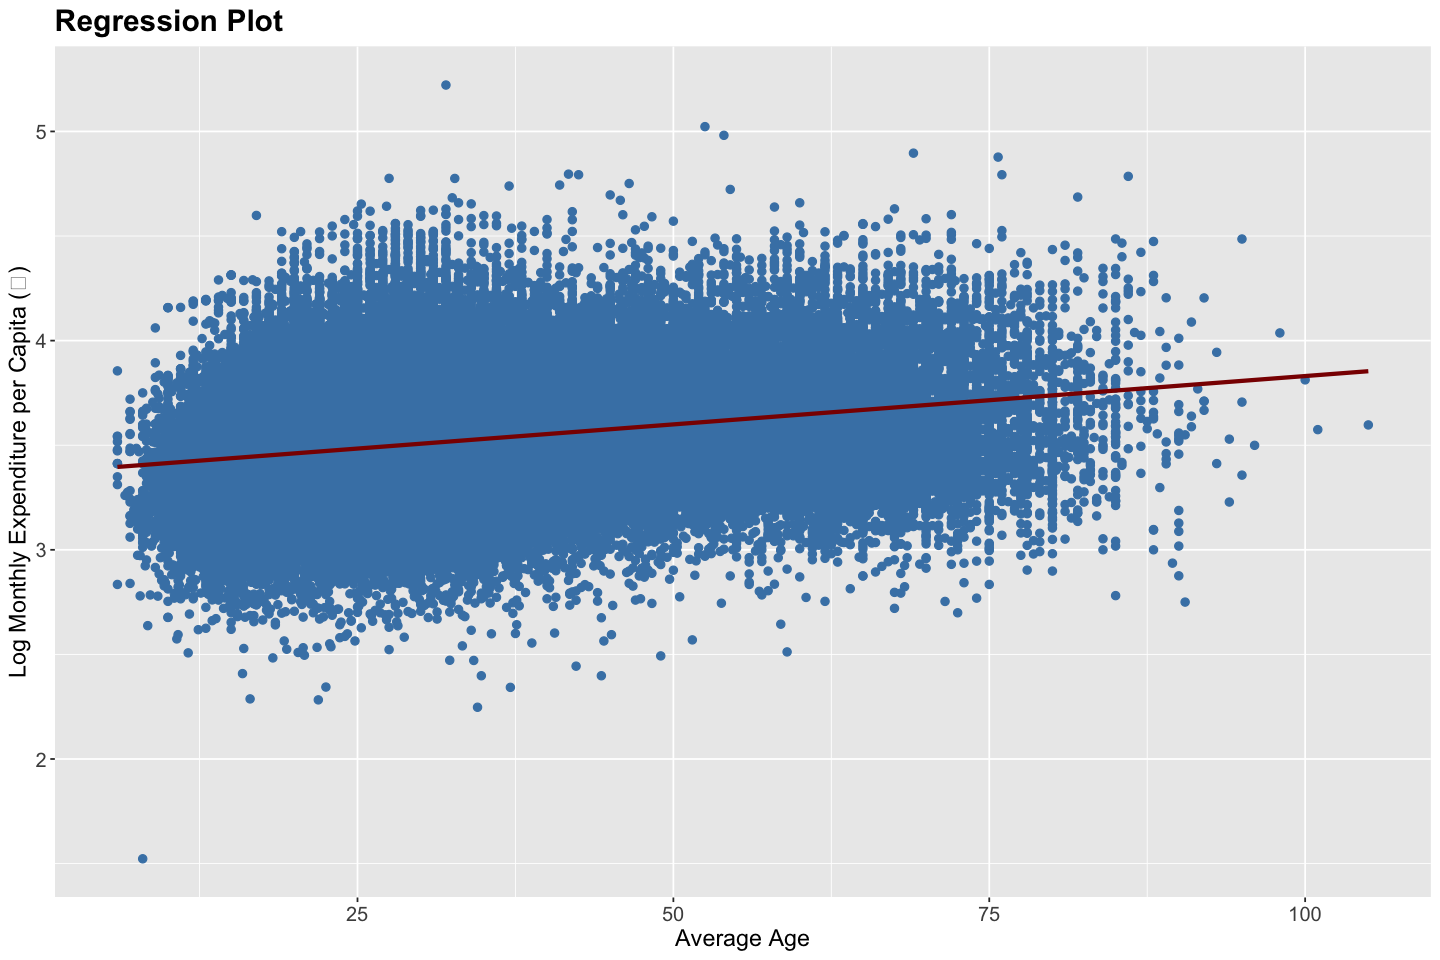

In [41]:
# Regression Plot
ggplot(data, aes(x = average_age, y = log10(total_expenditure / household_size))) +
  geom_point(color = "steelblue", size = 2) +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "darkred", linewidth = 1.2) +
  labs(
    title = "Regression Plot",
    x = "Average Age",
    y = "Log Monthly Expenditure per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

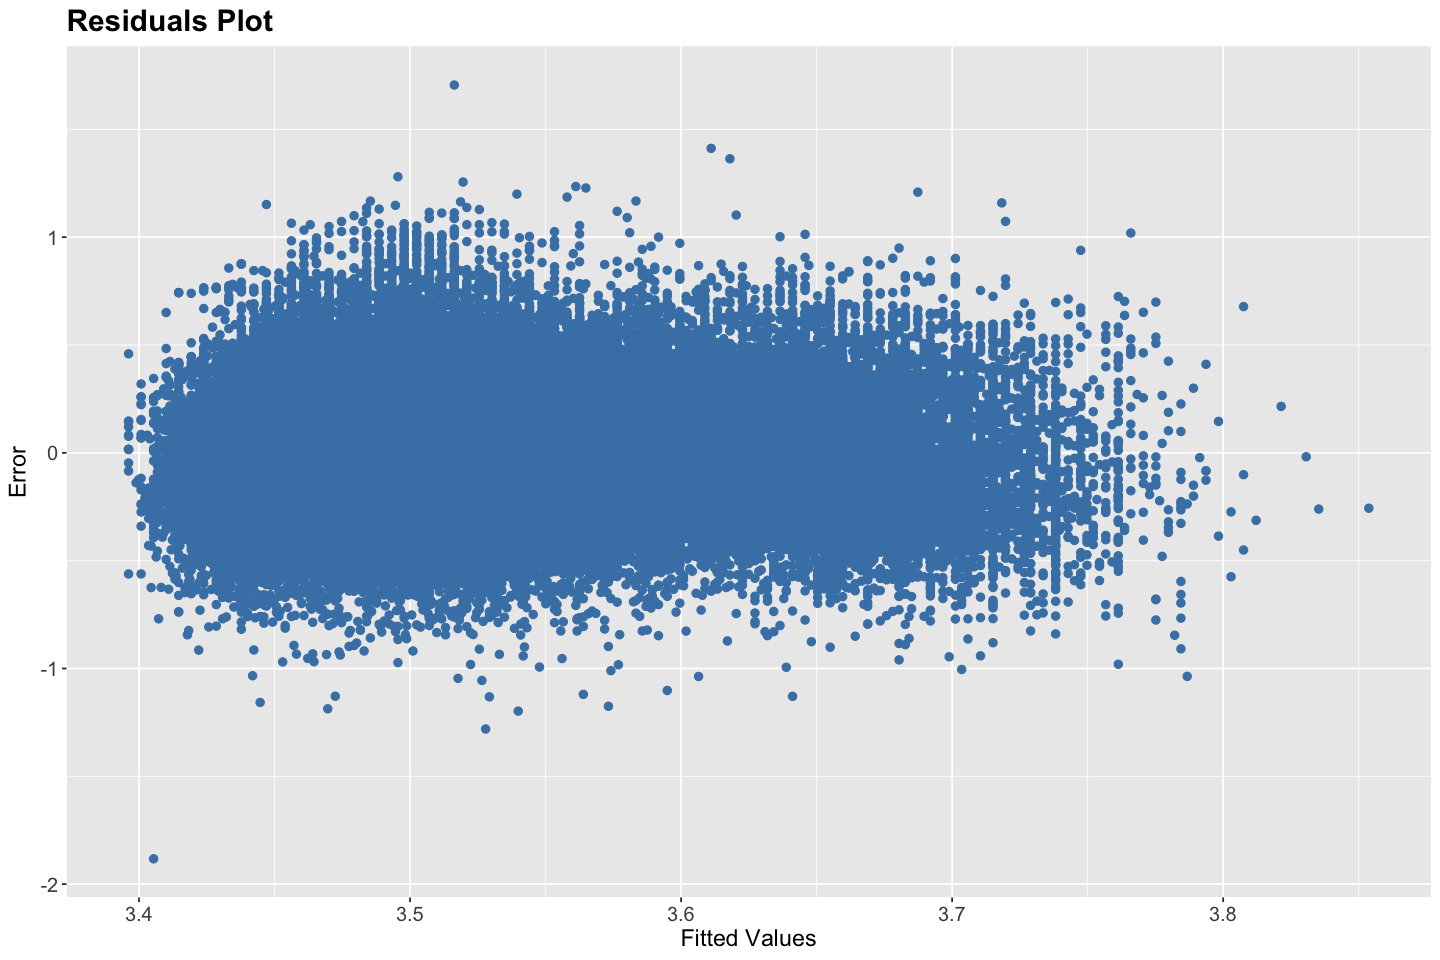

In [42]:
# Residuals Plot
ggplot(data, aes(x = fitted(model), y = resid(model))) +
  geom_point(color = "steelblue", size = 2) +
  labs(
    title = "Residuals Plot",
    x = "Fitted Values",
    y = "Error"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )